In [2]:
##############################################
# Program to illustrate the K-means algorithm
# Author: Sumohana Channappayya
##############################################
# Import all required libraries
import numpy as np
from matplotlib import pyplot as plt

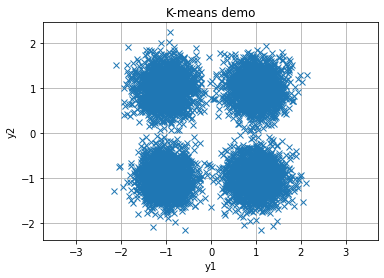

In [3]:
# NOTE: This code is written specifically for the case K = 4 and data dimension p = 2
# You will have to update this to handle the general case

# First generate random numbers
# For illustration, we will generate 2-D points
# Specifically, four clusters from a 2-D Gaussian distribution
NUM_PTS = 2000

# Generate clusters
mean1 = [1, 1]
cov1 = [[0.1,0],[0,0.1]]
y1 = np.random.multivariate_normal(mean1, cov1, NUM_PTS).T 

mean2 = [-1, 1]
cov2 = [[0.1,0],[0,0.1]]
y2 = np.random.multivariate_normal(mean2, cov2, NUM_PTS).T 

mean3 = [-1, -1]
cov3 = [[0.1,0],[0,0.1]]
y3 = np.random.multivariate_normal(mean3, cov3, NUM_PTS).T 

mean4 = [1, -1]
cov4 = [[0.1,0],[0,0.1]]
y4 = np.random.multivariate_normal(mean4, cov4, NUM_PTS).T 
Y = np.concatenate((y1, y2, y3, y4), axis = 1)

# Display the data
plt.plot(Y[0,:], Y[1,:],'x')
plt.axis('equal')
plt.grid(True)
plt.xlabel('y1')
plt.ylabel('y2')
plt.title('K-means demo')
plt.show()


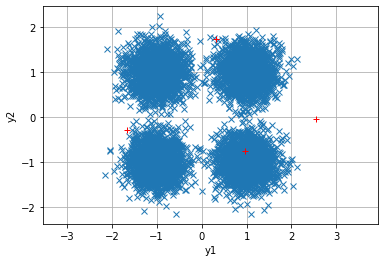

In [4]:
# NOTE: This code is written specifically for the case K = 4 and data dimension p = 2
# You will have to update this to handle the general case

# Now start the algorithm
# Set stopping condition 
epsilon = 0.001
# Initialize error to a large value
error = 10000
# Initialize centroids - assume 4 of them from a 2D Gaussian distribution (zero mean, unit variance)
D = np.random.multivariate_normal([0, 0], [[1, 0],[0, 1]], 4).T 

# Plot centroids
plt.plot(Y[0,:], Y[1,:],'x')
plt.axis('equal')
plt.grid(True)
plt.xlabel('y1')
plt.ylabel('y2')
plt.plot(D[0,:], D[1,:],'r+')
plt.show()

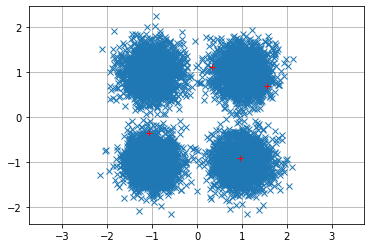

Iteration:  1 Error:  1.5177644437176723


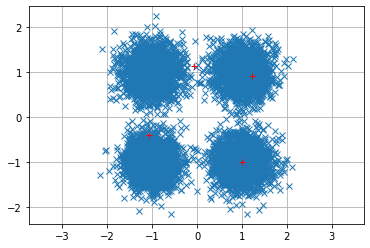

Iteration:  2 Error:  0.578678421996414


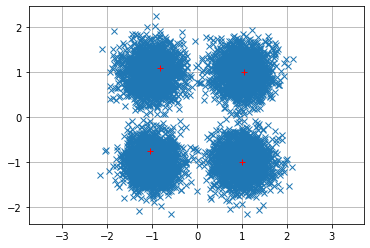

Iteration:  3 Error:  0.8416605868741945


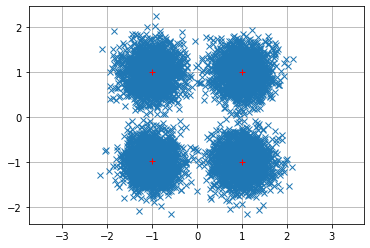

Iteration:  4 Error:  0.3186731389672725


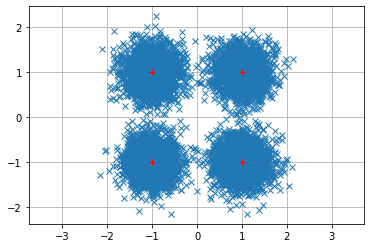

Iteration:  5 Error:  0.00883997607489948


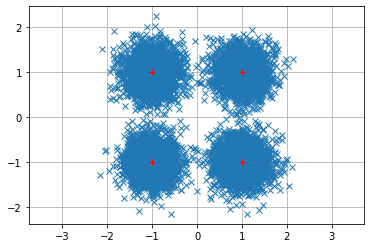

Iteration:  6 Error:  0.0
Centroids: [[-1.00197822 -1.00437094  0.99952031  0.99650033]
 [ 1.0018223  -0.98996419  1.00729911 -1.0010942 ]]


In [5]:
# NOTE: This code is written specifically for the case K = 4 and data dimension p = 2
# You will have to update this to handle the general case
# Initialize iteration count to 0
count = 0
# Initialize cluster size to 0
while (error > epsilon):
    num1 = num2 = num3 = num4 = 0
    # Initialize centroid update to 0
    x1 = y1 = 0
    x2 = y2 = 0
    x3 = y3 = 0
    x4 = y4 = 0

    # Update clusters based on distance
    for idx in range(4*NUM_PTS):
        cur_y = Y[:,idx]
        # NOTE: There are more efficient ways of computing distances and norms.
        # This code is just for illustration and in no way optimized.

        # Find Euclidean distance of current point from each centroid
        d1 = np.sqrt(np.square(cur_y[0] - D[0,0]) + np.square(cur_y[1] - D[1,0]))
        d2 = np.sqrt(np.square(cur_y[0] - D[0,1]) + np.square(cur_y[1] - D[1,1]))
        d3 = np.sqrt(np.square(cur_y[0] - D[0,2]) + np.square(cur_y[1] - D[1,2]))
        d4 = np.sqrt(np.square(cur_y[0] - D[0,3]) + np.square(cur_y[1] - D[1,3]))
        distance_vector = [d1, d2, d3, d4]

        # Find closest centroid 
        min_idx = distance_vector.index(np.min(distance_vector))
        if (min_idx == 0):
            # NOTE: This code only updates centroids. You must update the clusters as well.
            # Update centroid and count
            x1 = x1 + cur_y[0]
            y1 = y1 + cur_y[1]
            num1 = num1 + 1
        elif (min_idx == 1):
            # Update centroid and count
            x2 = x2 + cur_y[0]
            y2 = y2 + cur_y[1]
            num2 = num2 + 1
        elif (min_idx == 2):
            # Update centroid and count
            x3 = x3 + cur_y[0]
            y3 = y3 + cur_y[1]
            num3 = num3 + 1
        elif (min_idx == 3):
            # Update centroid and count
            x4 = x4 + cur_y[0]
            y4 = y4 + cur_y[1]
            num4 = num4 + 1
    
    # NOTE: The divide by zero case has to be handled gracefully
    # Calculate centroids
    x1 = x1/num1; y1 = y1/num1
    x2 = x2/num2; y2 = y2/num2
    x3 = x3/num3; y3 = y3/num3
    x4 = x4/num4; y4 = y4/num4

    # Compute distance between centroids
    error = np.sqrt((np.square(x1 - D[0,0]) + np.square(y1 - D[1,0])) + (np.square(x2 - D[0,1]) + np.square(y2 - D[1,1])) + (np.square(x3 - D[0,2]) + np.square(y3 - D[1,2])) + (np.square(x4 - D[0,3]) + np.square(y4 - D[1,3])))

    # Update centroids
    D[0, 0] = x1; D[1, 0] = y1
    D[0, 1] = x2; D[1, 1] = y2
    D[0, 2] = x3; D[1, 2] = y3
    D[0, 3] = x4; D[1, 3] = y4

    # Update count
    count += 1
    
    # Plot updated centroids
    plt.plot(Y[0,:], Y[1,:],'x')
    plt.axis('equal')
    plt.grid(True)
    plt.plot(D[0,:], D[1,:],'r+')
    plt.pause(1)
    plt.ion()
    plt.show()

    # Print error
    print ('Iteration: ', count, 'Error: ', error)

# Print centroids
print ('Centroids:', D)
